# Algorithm Evaluation
Purpose is to select which is best algo for given specific dataset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
s = df.isna().sum()
s

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### Create X and Y (Seperate dependent and Independent features)

In [6]:
X = df.drop(columns=['PassengerId','Name','Ticket','Survived'])
Y = df[['Survived']]

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [8]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Perform cat , con seperation

In [9]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [10]:
cat

['Sex', 'Cabin', 'Embarked']

In [11]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [12]:
cat1 = ['Sex', 'Embarked']
cat2 = ['Cabin']

In [13]:
cat1

['Sex', 'Embarked']

In [14]:
cat2

['Cabin']

### Build a pipeline

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [16]:
# Numerical pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# Categorical Pipeline 1 
cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

# Categorical Pipeline 2
cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

# Combine Pipeline with Column Transformer
pre = ColumnTransformer([('num',num_pipe, con),
                         ('cat1',cat_pipe1, cat1),
                         ('cat2',cat_pipe2, cat2)])

In [17]:
X_pre = pre.fit_transform(X).toarray()
X_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ]])

In [18]:
cols = pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat1__Sex_female', 'cat1__Sex_male', 'cat1__Embarked_C',
       'cat1__Embarked_Q', 'cat1__Embarked_S', 'cat2__Cabin_A10',
       'cat2__Cabin_A14', 'cat2__Cabin_A16', 'cat2__Cabin_A19',
       'cat2__Cabin_A20', 'cat2__Cabin_A23', 'cat2__Cabin_A24',
       'cat2__Cabin_A26', 'cat2__Cabin_A31', 'cat2__Cabin_A32',
       'cat2__Cabin_A34', 'cat2__Cabin_A36', 'cat2__Cabin_A5',
       'cat2__Cabin_A6', 'cat2__Cabin_A7', 'cat2__Cabin_B101',
       'cat2__Cabin_B102', 'cat2__Cabin_B18', 'cat2__Cabin_B19',
       'cat2__Cabin_B20', 'cat2__Cabin_B22', 'cat2__Cabin_B28',
       'cat2__Cabin_B3', 'cat2__Cabin_B30', 'cat2__Cabin_B35',
       'cat2__Cabin_B37', 'cat2__Cabin_B38', 'cat2__Cabin_B39',
       'cat2__Cabin_B4', 'cat2__Cabin_B41', 'cat2__Cabin_B42',
       'cat2__Cabin_B49', 'cat2__Cabin_B5', 'cat2__Cabin_B50',
       'cat2__Cabin_B51 B53 B55', 'cat2__Cabin_B57 B59 B63 B66',
       'cat2__Cabin_B58 B60',

In [19]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Sex_female,cat1__Sex_male,cat1__Embarked_C,cat1__Embarked_Q,cat1__Embarked_S,...,cat2__Cabin_F E69,cat2__Cabin_F G63,cat2__Cabin_F G73,cat2__Cabin_F2,cat2__Cabin_F33,cat2__Cabin_F38,cat2__Cabin_F4,cat2__Cabin_G6,cat2__Cabin_T,cat2__Cabin_unknown
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [21]:
xtrain.shape

(712, 158)

In [22]:
xtest.shape

(179, 158)

### Evaluate algorithms

### If dataset size is bigger you can ignore SVM and KNN (These algorithms are slow and less effective on larger datasets)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [24]:
dct = {'LogisticRegression':LogisticRegression(),
       'DecisionTree':DecisionTreeClassifier(),
       'RandomForest':RandomForestClassifier(),
       'GradientBoosting':GradientBoostingClassifier(),
       'SVM':SVC()}

In [25]:
dct.items()

dict_items([('LogisticRegression', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('GradientBoosting', GradientBoostingClassifier()), ('SVM', SVC())])

In [26]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model on training data
    model.fit(xtrain, ytrain)

    # Predict train and test results
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)

    # Calculate F1 scores Training
    f1_tr = f1_score(ytrain, ypred_tr)

    # Calculate F1 Cross validated results
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1')
    f1_tr_cv = scores.mean()

    # Calculate F1 score in testing
    f1_ts = f1_score(ytest, ypred_ts)

    # Append all values in list
    tr.append(f1_tr)
    tr_cv.append(f1_tr_cv)
    ts.append(f1_ts)

    # Print the results
    print(f'Model Name : {name}\n')
    print(f'F1 Training : {f1_tr:.4f}')
    print(f'F1 Training CV : {f1_tr_cv:.4f}')
    print(f'F1 Testing : {f1_ts:.4f}')
    print('\n===========================================\n')

Model Name : LogisticRegression

F1 Training : 0.7669
F1 Training CV : 0.7067
F1 Testing : 0.7778


Model Name : DecisionTree

F1 Training : 0.9791
F1 Training CV : 0.7013
F1 Testing : 0.7662


Model Name : RandomForest

F1 Training : 0.9791
F1 Training CV : 0.7410
F1 Testing : 0.7194


Model Name : GradientBoosting

F1 Training : 0.8661
F1 Training CV : 0.7505
F1 Testing : 0.7299


Model Name : SVM

F1 Training : 0.7732
F1 Training CV : 0.7551
F1 Testing : 0.7660




### Create a dataframe for model evaluation

In [27]:
dct_eval = {'Name':list(dct.keys()),
            'TrainF1':tr,
            'TrainF1CV':tr_cv,
            'TestF1':ts}

In [29]:
df_eval = pd.DataFrame(dct_eval)
df_eval

,Name,TrainF1,TrainF1CV,TestF1
0,LogisticRegression,0.766859,0.706743,0.777778
1,DecisionTree,0.979127,0.701284,0.766234
2,RandomForest,0.979127,0.740984,0.719424
3,GradientBoosting,0.866142,0.750464,0.729927
4,SVM,0.773176,0.755126,0.765957


In [30]:
df_eval.sort_values(by='TestF1',ascending=False)

,Name,TrainF1,TrainF1CV,TestF1
0,LogisticRegression,0.766859,0.706743,0.777778
1,DecisionTree,0.979127,0.701284,0.766234
4,SVM,0.773176,0.755126,0.765957
3,GradientBoosting,0.866142,0.750464,0.729927
2,RandomForest,0.979127,0.740984,0.719424


### Select the logistic regression model
Perform hyperparameter tuning on top model

In [32]:
params = {'C':[0.001, 0.01, 0.1, 1, 10, 50, 100, 1000]}

In [33]:
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression()
rscv = RandomizedSearchCV(lr, param_distributions=params, cv=5, scoring='f1', random_state=21)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 50, 100,
                                              1000]},
                   random_state=21, scoring='f1')

In [34]:
rscv.best_params_

{'C': 10}

In [35]:
rscv.best_score_

0.7251923768428623

In [36]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=10)

### Evaluate best model

In [37]:
best_lr.score(xtrain, ytrain)

0.8497191011235955

In [38]:
best_lr.score(xtest, ytest)

0.8100558659217877

### Predict train and test data

In [39]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [40]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [41]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [42]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [44]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

### Create a confusion Matrix

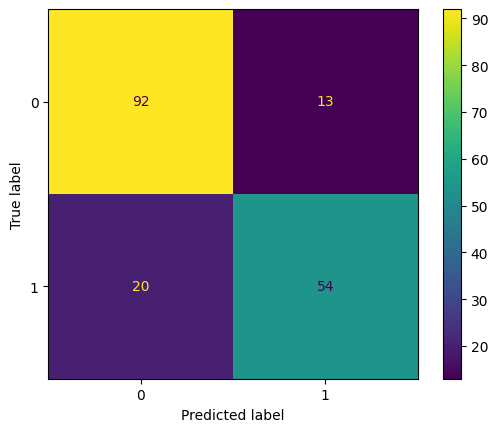

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_lr.classes_)
cfd.plot()

### Print classification Report on test data

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



### Calculating ROC - AUC Score

In [49]:
yprob_tr = best_lr.predict_proba(xtrain)[:,1]
yprob_ts = best_lr.predict_proba(xtest)[:,1]

In [50]:
yprob_tr[0:5]

array([0.07314147, 0.23282152, 0.08851203, 0.07759839, 0.45056365])

In [51]:
yprob_ts[0:5]

array([0.09534645, 0.18317863, 0.13058389, 0.89614266, 0.75015403])

In [53]:
## Check roc_auc score in training
from sklearn.metrics import roc_auc_score
roc_auc_score(ytrain, yprob_tr)

0.8887152077450584

In [54]:
## Check roc auc score in testing
roc_auc_score(ytest, yprob_ts)

0.8776061776061777

### Plot the ROC AUC Score

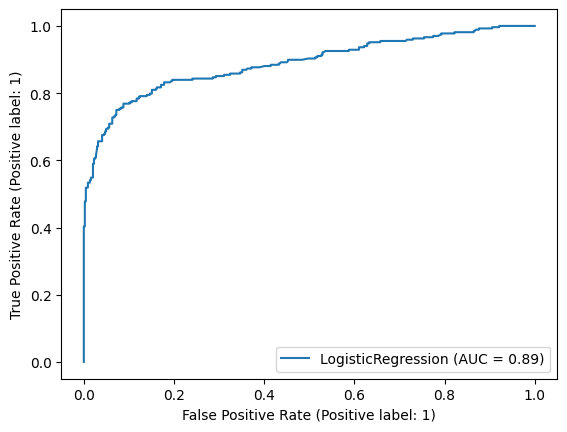

In [55]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr,xtrain, ytrain)

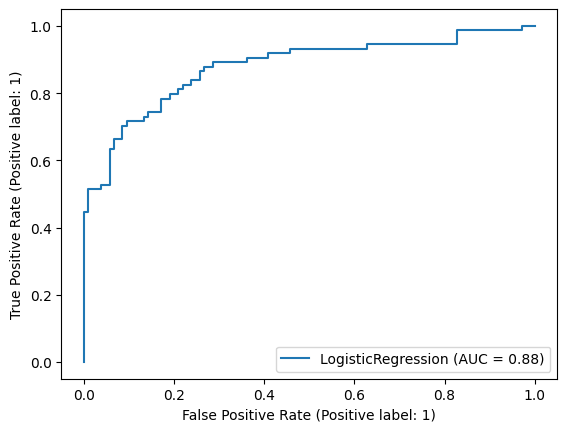

In [56]:
RocCurveDisplay.from_estimator(best_lr, xtest, ytest)

### Predict the test_titanic.csv

In [57]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
xnew_pre = pre.transform(xnew).toarray()
xnew_pre

array([[ 0.82737724,  0.39488658, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  1.35550962,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36936484,  2.50825727, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724,  0.70228595, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 , -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ]])

In [60]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Sex_female,cat1__Sex_male,cat1__Embarked_C,cat1__Embarked_Q,cat1__Embarked_S,...,cat2__Cabin_F E69,cat2__Cabin_F G63,cat2__Cabin_F G73,cat2__Cabin_F2,cat2__Cabin_F33,cat2__Cabin_F38,cat2__Cabin_F4,cat2__Cabin_G6,cat2__Cabin_T,cat2__Cabin_unknown
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
# Predict values
preds = best_lr.predict(xnew_pre)
probs = best_lr.predict_proba(xnew_pre)[:,1]

In [62]:
preds[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [63]:
probs[0:5]

array([0.10544591, 0.37868509, 0.08783716, 0.10463535, 0.58088792])

### Creating results in new datframe

In [64]:
df_res = xnew[['PassengerId']]
df_res

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [65]:
df_res['Survived']=preds
df_res['Probability']=probs

In [66]:
df_res

,PassengerId,Survived,Probability
0,892,0,0.105446
1,893,0,0.378685
2,894,0,0.087837
3,895,0,0.104635
4,896,1,0.580888
...,...,...,...
413,1305,0,0.101017
414,1306,1,0.961319
415,1307,0,0.071005
416,1308,0,0.101017


<Axes: xlabel='Survived'>

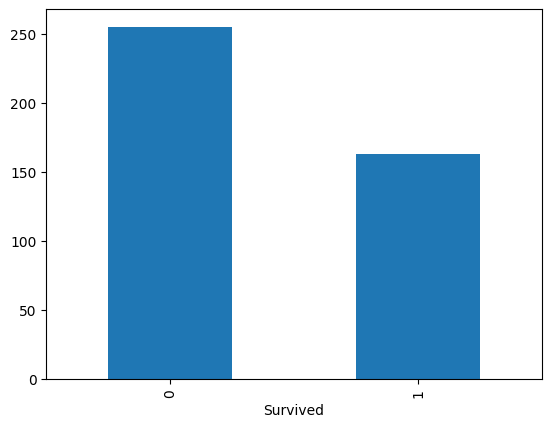

In [67]:
df_res['Survived'].value_counts().plot(kind='bar')

In [68]:
df_res.to_csv('results.csv',index=False)